In [115]:
from pathlib import Path
import json
import sys
from IPython.display import Image
import re

sys.path.append("../../mmda/src/")

from mmda.types import Document

In [71]:
def get_page(doc, p):
    for i, page in enumerate(doc.pages):
        if i == p-1:
            for j, row in enumerate(page.blocks):
                print((j, row.text))

def get_span_by_type(doc, type_):
    return [_.text for _ in doc.vila_span_groups if _.type == type_]

# Veit 2023

In [49]:
with open('../output/group_selection_mmda/veit_evolutionary_2023.json') as f_in:
    doc_dict = json.load(f_in)
    doc = Document.from_json(doc_dict)

with open("../output/group_selection_grobid/veit_evolutionary_2023.json") as f_in:
    doc_dict_grobid = json.load(f_in)

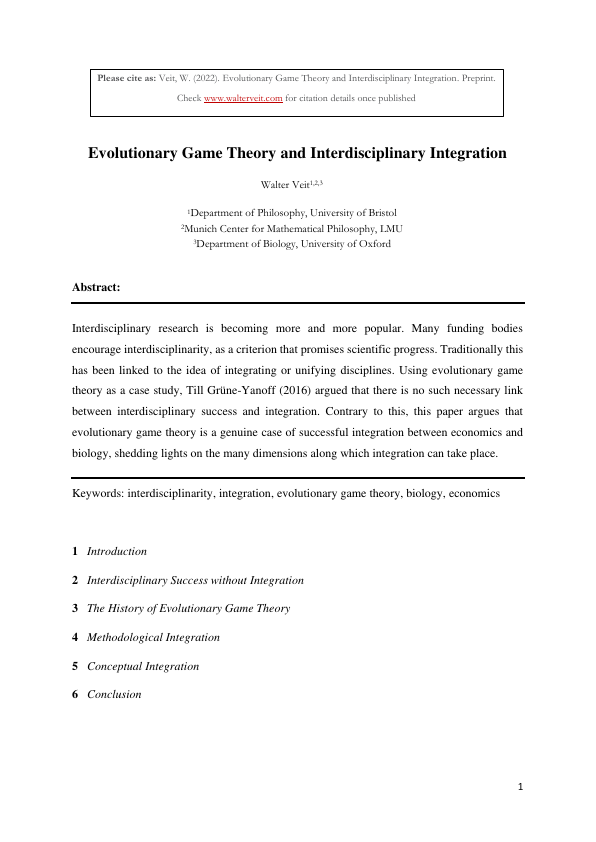

In [3]:
display(doc.images[0])

In [6]:
[_.text for _ in doc.vila_span_groups if _.type == 'Abstract']

['Abstract:\nInterdisciplinary research is becoming more and more popular. Many funding bodies\nencourage interdisciplinarity, as a criterion that promises scientific progress. Traditionally this\nhas been linked to the idea of integrating or unifying disciplines. Using evolutionary game\ntheory as a case study, Till Grüne-Yanoff (2016) argued that there is no such necessary link\nbetween interdisciplinary success and integration. Contrary to this, this paper argues that\nevolutionary game theory is a genuine case of successful integration between economics and\nbiology, shedding lights on the many dimensions along which integration can take place.']

In [12]:
doc_dict_grobid['abstract']

'Interdisciplinary research is becoming more and more popular. Many funding bodies encourage interdisciplinarity, as a criterion that promises scientific progress. Traditionally this has been linked to the idea of integrating or unifying disciplines. Using evolutionary game theory as a case study, Till Grüne-Yanoff (2016) argued that there is no such necessary link between interdisciplinary success and integration. Contrary to this, this paper argues that evolutionary game theory is a genuine case of successful integration between economics and biology, shedding lights on the many dimensions along which integration can take place.'

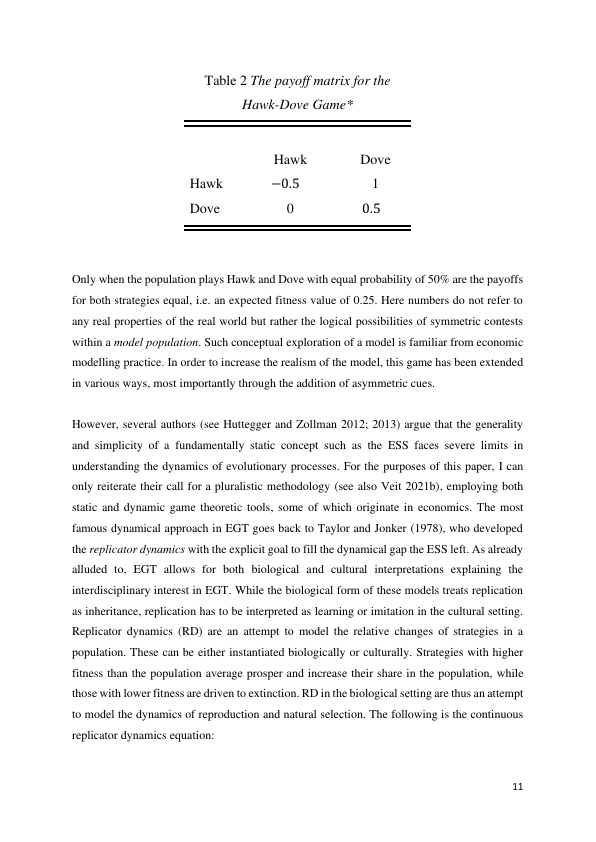

In [50]:
display(doc.images[10])

In [18]:
doc.fields

['tokens', 'rows', 'pages', 'words', 'blocks', 'vila_span_groups']

In [51]:
get_page(doc, 11)

(0, 'Hawk\nDove\nHawk\n−0.5\n1\nDove\n0\n0.5')
(1, 'Only when the population plays Hawk and Dove with equal probability of 50% are the payoffs\nfor both strategies equal, i.e. an expected fitness value of 0.25. Here numbers do not refer to\nany real properties of the real world but rather the logical possibilities of symmetric contests\nwithin a model population . Such conceptual exploration of a model is familiar from economic\nmodelling practice. In order to increase the realism of the model, this game has been extended\nin various ways, most importantly through the addition of asymmetric cues.')
(2, 'However, several authors (see Huttegger and Zollman 2012; 2013) argue that the generality\nand simplicity of a fundamentally static concept such as the ESS faces severe limits in\nunderstanding the dynamics of evolutionary processes. For the purposes of this paper, I can\nonly reiterate their call for a pluralistic methodology (see also Veit 2021b), employing both\nstatic and dynamic ga

In [43]:
[row['text'] for row in doc_dict_grobid['pdf_parse']['body_text'] if re.search("Only when", row['text'], re.IGNORECASE)]

['The result of solving equation (1.3) is P = V/C with P representing the share of Hawks or the probability of individuals playing Hawk. 5 If the fitness value of the resource is 1 and the cost of fighting 2, or generally twice as large as the value of the resource the population will be in a mixed equilibrium with either 50% playing Hawk and 50% playing Dove or a mixed strategy randomizing between Hawk and Dove. By putting these arbitrary values into the payoff-matrix, this result can be easily illustrated: Only when the population plays Hawk and Dove with equal probability of 50% are the payoffs for both strategies equal, i.e. an expected fitness value of 0.25. Here numbers do not refer to any real properties of the real world but rather the logical possibilities of symmetric contests within a model population. Such conceptual exploration of a model is familiar from economic modelling practice. In order to increase the realism of the model, this game has been extended in various ways

Note: only when we look at the previous page that we undertand that actually GROBID kept the section together.

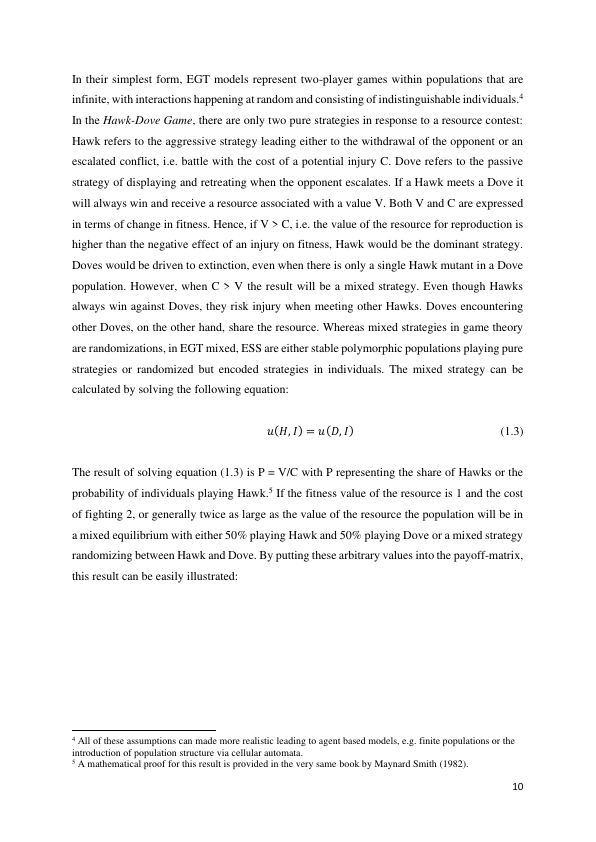

In [44]:
display(doc.images[9])

 - Both parsing scheme were able to correctly identify the abstract.
 - The `Block` level of analysis seems to be working page by page, as it misses the previous sentence. GROBID caught that.
 - Overall the parsing is both good, if this is what we care about.

Now, what if we go back in the past?

# Driver 1967

In [52]:
with open('../output/group_selection_mmda/driver_discussions_1967.json') as f_in:
    doc_dict = json.load(f_in)
    doc = Document.from_json(doc_dict)

with open("../output/group_selection_grobid/driver_discussions_1967.json") as f_in:
    doc_dict_grobid = json.load(f_in)

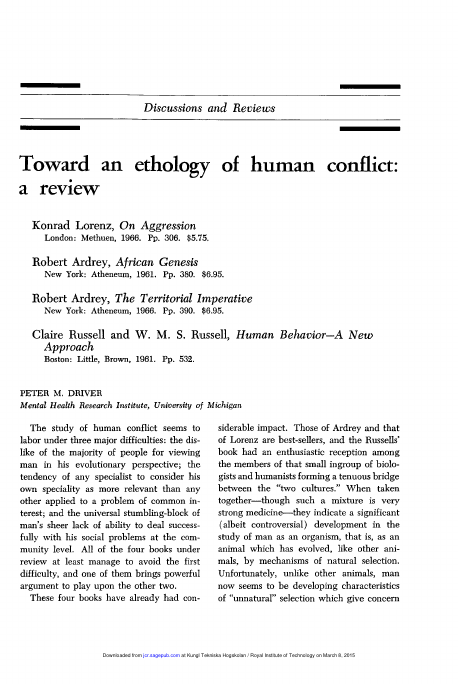

In [75]:
display(doc.images[0])

In [67]:
doc_dict_grobid['title']

''

In [72]:
get_span_by_type(doc, 'Title')

['Toward\nan\nethology\nof\nhuman\nconflict:\na\nreview',
 ', Human',
 '&',
 ';A New\nApproach']

In [63]:
get_page(doc, 1)

(0, 'Discussions and Reviews\nToward\nan\nethology\nof\nhuman\nconflict:\na\nreview\nKonrad Lorenz, On Aggression\nLondon: Methuen, 1966. Pp. 306. $5.75.\nRobert Ardrey, African Genesis\nNew York: Atheneum, 1961. Pp. 380. $6.95.\nRobert Ardrey, The Territorial Imperative\nNew York: Atheneum, 1966. Pp. 390. $6.95.\nClaire Russell and W. M. S. Russell, Human Behavior&mdash;A New\nApproach\nBoston: Little, Brown, 1961. Pp. 532.\nPETER M. DRIVER Michigan')
(1, 'The study of human conflict seems to\nlabor under three major difficulties: the dis-\nlike of the majority of people for viewing\nman in his evolutionary perspective; the\ntendency of any specialist to consider his\nown speciality as more relevant than any\nother applied to a problem of common in-\nterest ; and the universal stumbling-block of\nman’s sheer lack of ability to deal success-\nfully with his social problems at the com-\nmunity level. All of the four books under\nreview at least manage to avoid the first\ndifficulty, and

In [79]:
[row['text'] for row in doc_dict_grobid['pdf_parse']['body_text'][0:3]]

['to many people, including the authors of these books and of this review. Certainly, no other animal exhibits anything like the degree of intraspecific killing and maiming shown by our own species. Whether any of the extinct animals owed their extinction to this kind of behavioral breakdown we shall probably never know, but what we must be clear about is that it is a behavioral breakdown-a biological malfunction-and that the behavioral biologist-the ethologist-is particularly fitted to study it. Ethology, as I have indicated, and as Lorenz himself (1965) has stated, may be regarded as the biology of behavior. This description, however, needs clarification. Anyone studying the behavior of organisms is studying biological phenomena, yet many students of behavior-psychologists, sociologists, psychiatrists, anthropologists, and so on-have little or only partial biological training. The ethologist has the distinction of being properly qualified, without obvious limits, for the study of his

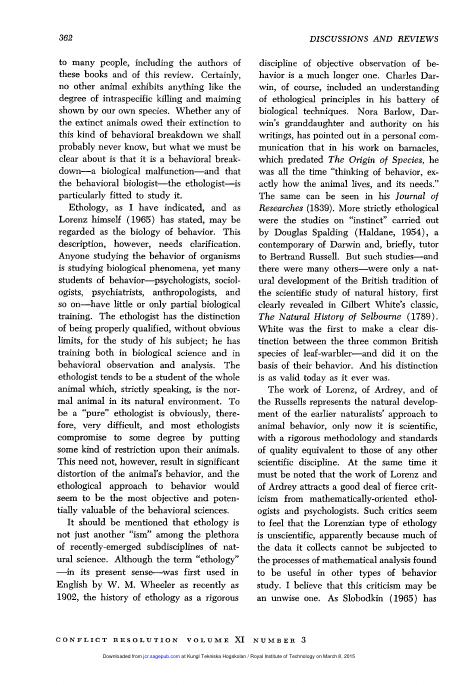

In [80]:
display(doc.images[1])

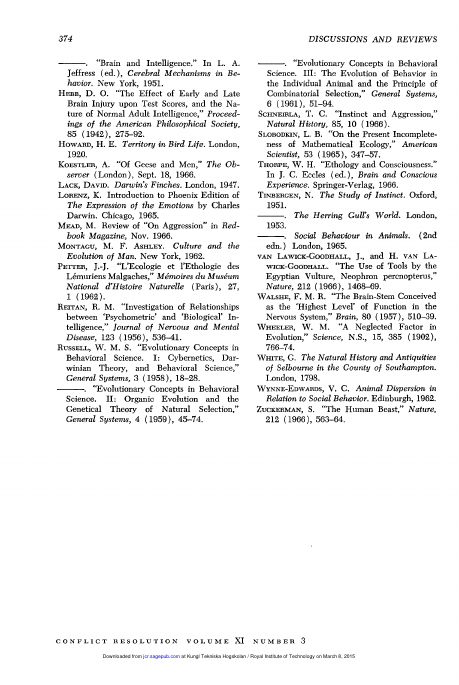

In [82]:
display(doc.images[-1])

In [111]:
[_['raw_text'] for _ in list(doc_dict_grobid['pdf_parse']['bib_entries'].values())[-50:]]

['ALSOP, J. "The Way of an Aggressor," The New Yorker, Sept. 10, 1966.',
 'BARNETT, S. A. "On the Hazards of Analogies between Human Aggression and Aggression in Other Animals," Scientific American, Jan. 1967.',
 'DARWIN, C. R. Journal of Researches. London, 1839. &mdash;. The Origin of Species. London, 1859. DRIVER, P. M. "An Ethological Approach to the Problem of Mind." In W. Corning (ed.), The Mind: Physical and Biological Ap- proaches to its Function. (In press.)',
 'FISHER, JAMES. "Evolution and Bird Sociality." In J. Huxley et al ., Evolution as a Process. London, 1954.',
 'GOODHALL, J. "Tool-using and Aimed Throw- ing in a Community of Free-Living Chim- panzees," Nature, 201 (1964), 1264-66.',
 'GORER, G. "Man Has No Killer Instinct," New York Times Magazine, Nov. 27, 1966.',
 'HALL, K. R. L., and G. B. SCHALLER. "The Tool-Using of the California Sea Otter (Enhydra lutris nereis)," J. Mammal., 45: 287, 1964.',
 'HALDANE, J. B. S. "Introducing Douglas Spald- ing," British Journal

In [99]:
bibtype=get_span_by_type(doc, 'Bibliography')
'\n'.join(bibtype).split("\n")[-50:]


['HEBB, D. O. "The Effect of Early and Late Brain',
 'Injury upon Test Scores, and the Na- ture of Normal Adult Intelligence," Proceed-',
 'ings of the American Philosophical Society, 85 (1942), 275-92.',
 'HOWARD, H. E. Territory in Bird Life. London, 1920.',
 'KOESTLER, A. "Of Geese and Men," The Ob-',
 'server (London), Sept. 18, 1966.',
 'LACK, DAVID. Darwin’s Finches. London, 1947.',
 'LORENZ, K. Introduction to Phoenix Edition of The Expression of the Emotions by Charles',
 'Darwin. Chicago, 1965.',
 'MEAD, M. Review of "On Aggression" in Red- book',
 'Magazine, Nov. 1966.',
 'MONTAGU, M. F. ASHLEY. Culture and the Evolution',
 'of Man. New York, 1962.',
 'PETTER, J.-J. "L’Ecologie et l’Ethologie des L&eacute;muriens Malgaches," M&eacute;moires du Mus&eacute;um',
 'National d’Histoire Naturelle (Paris), 27, 1 (1962).',
 'REITAN, R. M. "Investigation of Relationships between ’Psychometric’ and ’Biological’ In-',
 'telligence," Journal of Nervous and Mental',
 'Disease, 123 (1956),

The parsing here is not great. Overall, there are many problems.

 - GROBID missed the first page, which is not great. 
 - MMDA did not missed the first but the parsing is incomplete. It misses the first part of the second paragraph.
 - GROBID seems to have done a better job with the references.

# alexander_evolution_1974

In [113]:
with open("../output/group_selection_grobid/alexander_evolution_1974.json") as f_in:
    doc_dict_grobid = json.load(f_in)

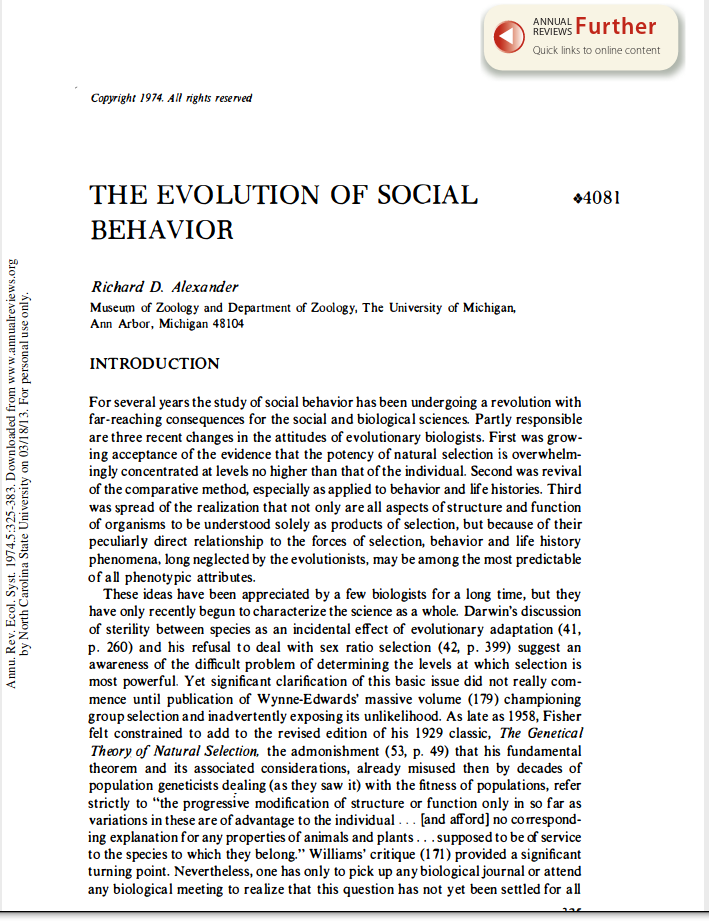

In [116]:
Image("alexader1974_page1.png")

In [118]:
doc_dict_grobid['title']

'THE EVOLUTION OF SOCIAL BEHAVIOR'

In [119]:
[row['text'] for row in doc_dict_grobid['pdf_parse']['body_text'][0:3]]

['For several years the study of social behavior has been undergoing a revolution with far-reaching consequences fo r the social and biological sciences. Partly responsible are three recent changes in the attitudes of evolutionary biologists. First was grow ing acceptance of the evidence that the potency of natural selection is overwhelm ingly concentrated at levels no higher than that of the individual. Second was revival of the comparative method, especially as applied to behavior and life histories. Third was spread of the realization that not only are all aspects of structure and function of organisms to be understood solely as products of selection, but because of their peculiarly direct relationship to the forces of selection, behavior and life history phenomena, long neglected by the evolutionists, may be among the most predictable of all phenotypic attributes.',
 'These ideas have been appreciated by a fe w biologists for a long time, but they have only recently begun to charac

 - Here we cannot even parse Alexander's article with `MMDA`, we're not sure why. For reference, here is the error message:

 >ValueError: Detected overlap with existing SpanGroup(s) [(209965, 210093, 263), (210056, 210057, 264)] for <mmda.types.annotation.SpanGroup object at 0x7f2c0552c850>

 - `GROBID` seems to be working fine.